## Deepar

In [16]:
import json
from gluonts.dataset.common import ListDataset
from gluonts.torch.model.deepar import DeepAREstimator
from gluonts.evaluation.backtest import make_evaluation_predictions
import matplotlib.pyplot as plt
from itertools import islice
from gluonts.evaluation import Evaluator
import pandas as pd

In [17]:
# Load JSONL into a list of dicts
with open("../data/processed/deepar_dataset.jsonl") as f:
    series_list = [json.loads(line) for line in f]


In [18]:
#subset 100 data points
s = series_list[0]
dataset = ListDataset(series_list, freq="15min")

In [38]:
from gluonts.torch.model.deepar import DeepAREstimator

estimator = DeepAREstimator(
    prediction_length=96,
    context_length=96,
    freq="15min",
    lags_seq=[1, 2, 3, 6, 12, 24, 48, 96, 192],
    hidden_size=80,     # RNN cell size
    num_layers=3,       # Depth of the network
    dropout_rate=0.1,
    lr=1e-3,
    weight_decay=1e-8,
    batch_size=64,
    num_batches_per_epoch=50,
    trainer_kwargs={
        "max_epochs": 50,
        "accelerator": "cpu",
        "gradient_clip_val": 10.0,
        "logger": False,
    }
)


In [39]:
predictor = estimator.train(dataset)


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/interestingtj/miniforge3/envs/satcast/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/interestingtj/miniforge3/envs/satcast/lib/python3.12/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
/Users/interestingtj/miniforge3/envs/satcast/lib/python3.12/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints exists and is not empty.

  | Name  | Type        | Params | Mode  | In sizes                                                      | Out sizes   
------------------------------------------------------------------------------------

Epoch 0: |          | 50/? [00:08<00:00,  6.23it/s, train_loss=1.320]

Epoch 0, global step 50: 'train_loss' reached 1.31957 (best 1.31957), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:07<00:00,  6.33it/s, train_loss=0.913]

Epoch 1, global step 100: 'train_loss' reached 0.91319 (best 0.91319), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:08<00:00,  6.11it/s, train_loss=0.759]

Epoch 2, global step 150: 'train_loss' reached 0.75891 (best 0.75891), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:07<00:00,  6.31it/s, train_loss=0.536]

Epoch 3, global step 200: 'train_loss' reached 0.53574 (best 0.53574), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:08<00:00,  6.22it/s, train_loss=0.316]

Epoch 4, global step 250: 'train_loss' reached 0.31573 (best 0.31573), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=4-step=250.ckpt' as top 1


Epoch 5: |          | 50/? [00:08<00:00,  6.07it/s, train_loss=0.113]

Epoch 5, global step 300: 'train_loss' reached 0.11288 (best 0.11288), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=5-step=300.ckpt' as top 1


Epoch 6: |          | 50/? [00:07<00:00,  6.27it/s, train_loss=0.0696]

Epoch 6, global step 350: 'train_loss' reached 0.06961 (best 0.06961), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=6-step=350.ckpt' as top 1


Epoch 7: |          | 50/? [00:07<00:00,  6.35it/s, train_loss=0.0529]

Epoch 7, global step 400: 'train_loss' reached 0.05294 (best 0.05294), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=7-step=400.ckpt' as top 1


Epoch 8: |          | 50/? [00:07<00:00,  6.29it/s, train_loss=0.211] 

Epoch 8, global step 450: 'train_loss' was not in top 1


Epoch 9: |          | 50/? [00:07<00:00,  6.31it/s, train_loss=0.190]

Epoch 9, global step 500: 'train_loss' was not in top 1


Epoch 10: |          | 50/? [00:08<00:00,  6.21it/s, train_loss=0.0854]

Epoch 10, global step 550: 'train_loss' was not in top 1


Epoch 11: |          | 50/? [00:07<00:00,  6.30it/s, train_loss=0.0537]

Epoch 11, global step 600: 'train_loss' was not in top 1


Epoch 12: |          | 50/? [00:07<00:00,  6.36it/s, train_loss=0.00332]

Epoch 12, global step 650: 'train_loss' reached 0.00332 (best 0.00332), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=12-step=650.ckpt' as top 1


Epoch 13: |          | 50/? [00:08<00:00,  6.17it/s, train_loss=-0.0248]

Epoch 13, global step 700: 'train_loss' reached -0.02477 (best -0.02477), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=13-step=700.ckpt' as top 1


Epoch 14: |          | 50/? [00:07<00:00,  6.29it/s, train_loss=0.340]  

Epoch 14, global step 750: 'train_loss' was not in top 1


Epoch 15: |          | 50/? [00:08<00:00,  6.23it/s, train_loss=0.120]

Epoch 15, global step 800: 'train_loss' was not in top 1


Epoch 16: |          | 50/? [00:08<00:00,  6.20it/s, train_loss=0.029]

Epoch 16, global step 850: 'train_loss' was not in top 1


Epoch 17: |          | 50/? [00:07<00:00,  6.25it/s, train_loss=-0.0734]

Epoch 17, global step 900: 'train_loss' reached -0.07342 (best -0.07342), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=17-step=900.ckpt' as top 1


Epoch 18: |          | 50/? [00:07<00:00,  6.30it/s, train_loss=-0.123] 

Epoch 18, global step 950: 'train_loss' reached -0.12313 (best -0.12313), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=18-step=950.ckpt' as top 1


Epoch 19: |          | 50/? [00:07<00:00,  6.27it/s, train_loss=-0.0412]

Epoch 19, global step 1000: 'train_loss' was not in top 1


Epoch 20: |          | 50/? [00:08<00:00,  6.22it/s, train_loss=-0.0539]

Epoch 20, global step 1050: 'train_loss' was not in top 1


Epoch 21: |          | 50/? [00:08<00:00,  6.15it/s, train_loss=-0.0617]

Epoch 21, global step 1100: 'train_loss' was not in top 1


Epoch 22: |          | 50/? [00:07<00:00,  6.27it/s, train_loss=-0.094] 

Epoch 22, global step 1150: 'train_loss' was not in top 1


Epoch 23: |          | 50/? [00:07<00:00,  6.32it/s, train_loss=-0.0814]

Epoch 23, global step 1200: 'train_loss' was not in top 1


Epoch 24: |          | 50/? [00:07<00:00,  6.26it/s, train_loss=-0.123] 

Epoch 24, global step 1250: 'train_loss' was not in top 1


Epoch 25: |          | 50/? [00:08<00:00,  6.17it/s, train_loss=0.00711]

Epoch 25, global step 1300: 'train_loss' was not in top 1


Epoch 26: |          | 50/? [00:07<00:00,  6.25it/s, train_loss=-0.0925]

Epoch 26, global step 1350: 'train_loss' was not in top 1


Epoch 27: |          | 50/? [00:07<00:00,  6.32it/s, train_loss=-0.131] 

Epoch 27, global step 1400: 'train_loss' reached -0.13060 (best -0.13060), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=27-step=1400.ckpt' as top 1


Epoch 28: |          | 50/? [00:07<00:00,  6.28it/s, train_loss=-0.173]

Epoch 28, global step 1450: 'train_loss' reached -0.17250 (best -0.17250), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=28-step=1450.ckpt' as top 1


Epoch 29: |          | 50/? [00:07<00:00,  6.27it/s, train_loss=-0.104]

Epoch 29, global step 1500: 'train_loss' was not in top 1


Epoch 30: |          | 50/? [00:07<00:00,  6.30it/s, train_loss=-0.179]

Epoch 30, global step 1550: 'train_loss' reached -0.17905 (best -0.17905), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=30-step=1550.ckpt' as top 1


Epoch 31: |          | 50/? [00:08<00:00,  6.24it/s, train_loss=-0.0655]

Epoch 31, global step 1600: 'train_loss' was not in top 1


Epoch 32: |          | 50/? [00:07<00:00,  6.32it/s, train_loss=0.356]  

Epoch 32, global step 1650: 'train_loss' was not in top 1


Epoch 33: |          | 50/? [00:08<00:00,  6.22it/s, train_loss=0.0642]

Epoch 33, global step 1700: 'train_loss' was not in top 1


Epoch 34: |          | 50/? [00:07<00:00,  6.30it/s, train_loss=-0.204]

Epoch 34, global step 1750: 'train_loss' reached -0.20404 (best -0.20404), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=34-step=1750.ckpt' as top 1


Epoch 35: |          | 50/? [00:08<00:00,  6.12it/s, train_loss=0.304] 

Epoch 35, global step 1800: 'train_loss' was not in top 1


Epoch 36: |          | 50/? [00:07<00:00,  6.28it/s, train_loss=-0.158]

Epoch 36, global step 1850: 'train_loss' was not in top 1


Epoch 37: |          | 50/? [00:08<00:00,  6.19it/s, train_loss=-0.0323]

Epoch 37, global step 1900: 'train_loss' was not in top 1


Epoch 38: |          | 50/? [00:07<00:00,  6.28it/s, train_loss=-0.108] 

Epoch 38, global step 1950: 'train_loss' was not in top 1


Epoch 39: |          | 50/? [00:07<00:00,  6.30it/s, train_loss=0.153] 

Epoch 39, global step 2000: 'train_loss' was not in top 1


Epoch 40: |          | 50/? [00:07<00:00,  6.29it/s, train_loss=-0.113]

Epoch 40, global step 2050: 'train_loss' was not in top 1


Epoch 41: |          | 50/? [00:07<00:00,  6.30it/s, train_loss=-0.372]

Epoch 41, global step 2100: 'train_loss' reached -0.37217 (best -0.37217), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=41-step=2100.ckpt' as top 1


Epoch 42: |          | 50/? [00:08<00:00,  6.12it/s, train_loss=-0.445]

Epoch 42, global step 2150: 'train_loss' reached -0.44479 (best -0.44479), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=42-step=2150.ckpt' as top 1


Epoch 43: |          | 50/? [00:08<00:00,  6.19it/s, train_loss=-0.397]

Epoch 43, global step 2200: 'train_loss' was not in top 1


Epoch 44: |          | 50/? [00:07<00:00,  6.31it/s, train_loss=-0.418]

Epoch 44, global step 2250: 'train_loss' was not in top 1


Epoch 45: |          | 50/? [00:07<00:00,  6.28it/s, train_loss=-0.357]

Epoch 45, global step 2300: 'train_loss' was not in top 1


Epoch 46: |          | 50/? [00:08<00:00,  6.18it/s, train_loss=-0.425]

Epoch 46, global step 2350: 'train_loss' was not in top 1


Epoch 47: |          | 50/? [00:08<00:00,  6.24it/s, train_loss=-0.26] 

Epoch 47, global step 2400: 'train_loss' was not in top 1


Epoch 48: |          | 50/? [00:07<00:00,  6.25it/s, train_loss=-0.422]

Epoch 48, global step 2450: 'train_loss' was not in top 1


Epoch 49: |          | 50/? [00:08<00:00,  6.19it/s, train_loss=-0.452]

Epoch 49, global step 2500: 'train_loss' reached -0.45214 (best -0.45214), saving model to '/Users/interestingtj/Documents/mds/capstone_deepar/Capstone_SatCast_Trilemma/analysis/checkpoints/epoch=49-step=2500-v1.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: |          | 50/? [00:08<00:00,  6.18it/s, train_loss=-0.452]


In [40]:
# Evaluate
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset,
    predictor=predictor,
    num_samples=100
)
forecast_list = list(forecast_it)
ts_list = list(ts_it)

In [41]:

# Evaluation
evaluator = Evaluator()
agg_metrics, item_metrics = evaluator([ts_list[1]], [forecast_list[1]])

# Print summary
print("\nAggregate Metrics:")
for k, v in agg_metrics.items():
    print(f"{k:>20}: {v:.4f}")


Running evaluation: 1it [00:00,  8.82it/s]



Aggregate Metrics:
                 MSE: 155.3704
           abs_error: 560.0723
      abs_target_sum: 703.0000
     abs_target_mean: 7.3229
      seasonal_error: 1.5896
                MASE: 3.6702
                MAPE: 0.5153
               sMAPE: 0.6955
                MSIS: 117.4514
num_masked_target_values: 0.0000
   QuantileLoss[0.1]: 123.4159
       Coverage[0.1]: 0.0104
   QuantileLoss[0.2]: 240.3899
       Coverage[0.2]: 0.1146
   QuantileLoss[0.3]: 354.0267
       Coverage[0.3]: 0.1458
   QuantileLoss[0.4]: 460.6170
       Coverage[0.4]: 0.1875
   QuantileLoss[0.5]: 560.0723
       Coverage[0.5]: 0.2292
   QuantileLoss[0.6]: 650.8224
       Coverage[0.6]: 0.3229
   QuantileLoss[0.7]: 732.7790
       Coverage[0.7]: 0.4688
   QuantileLoss[0.8]: 804.5023
       Coverage[0.8]: 0.5729
   QuantileLoss[0.9]: 863.4533
       Coverage[0.9]: 0.6875
                RMSE: 12.4648
               NRMSE: 1.7022
                  ND: 0.7967
  wQuantileLoss[0.1]: 0.1756
  wQuantileLoss[0.2]:

/Users/interestingtj/miniforge3/envs/satcast/lib/python3.12/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [42]:
ts_list[1]

,0
2025-03-05 02:00,2.000000
2025-03-05 02:15,3.000000
2025-03-05 02:30,2.000000
2025-03-05 02:45,2.333333
2025-03-05 03:00,3.333333
...,...
2025-05-12 18:45,13.333333
2025-05-12 19:00,9.333333
2025-05-12 19:15,8.000000
2025-05-12 19:30,6.000000


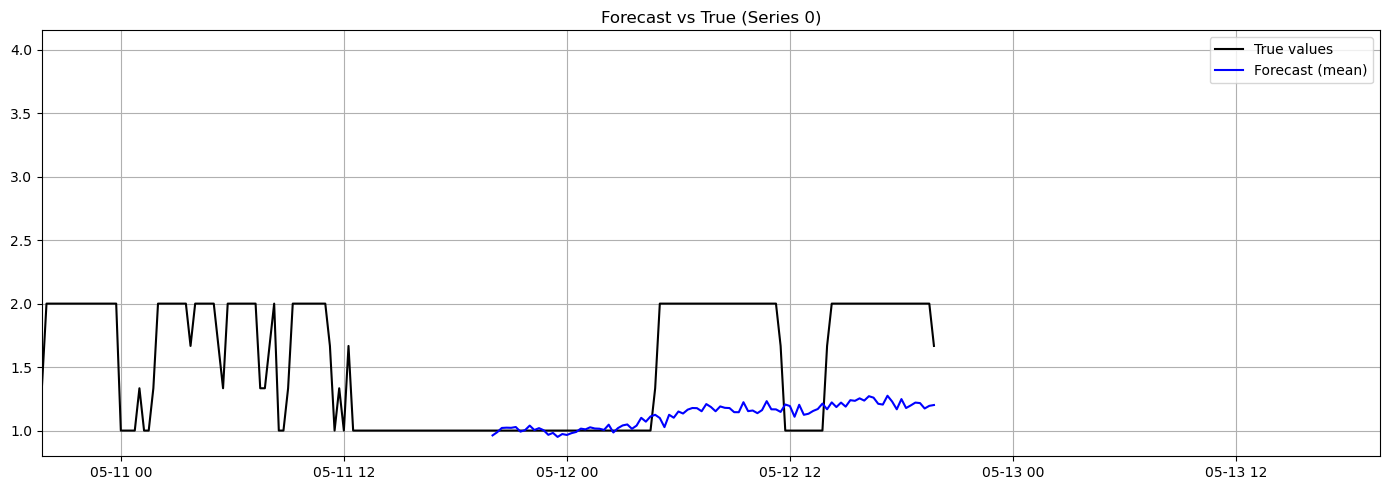

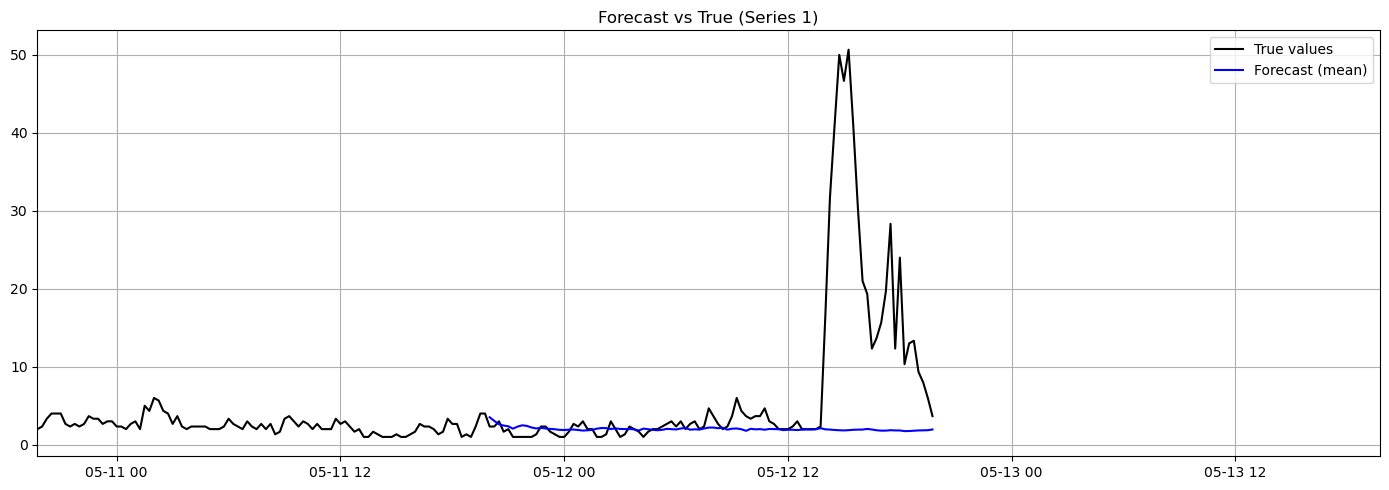

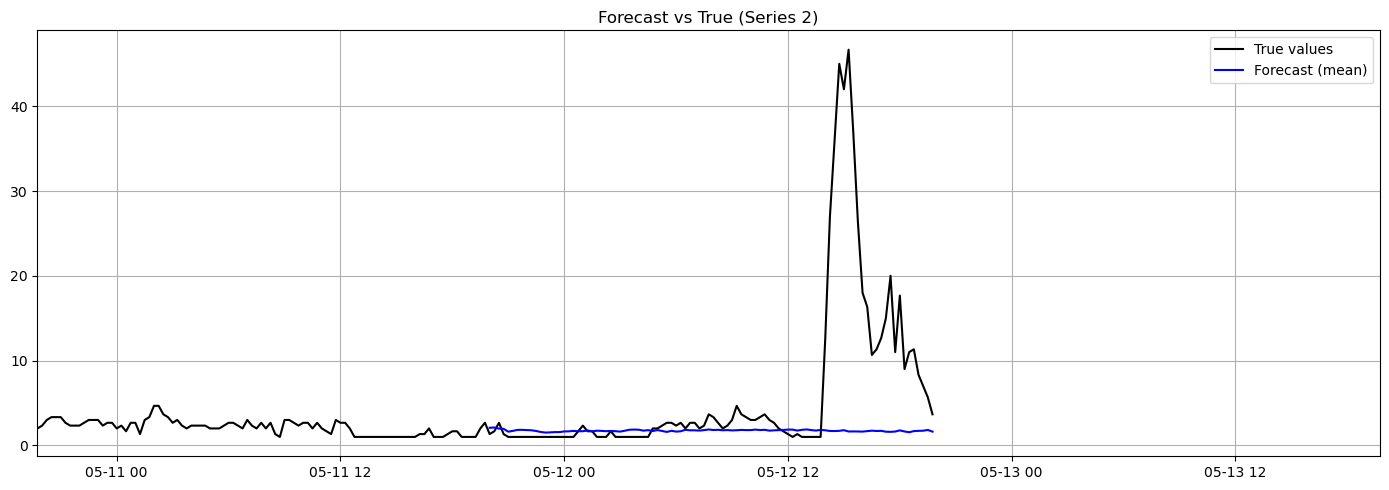

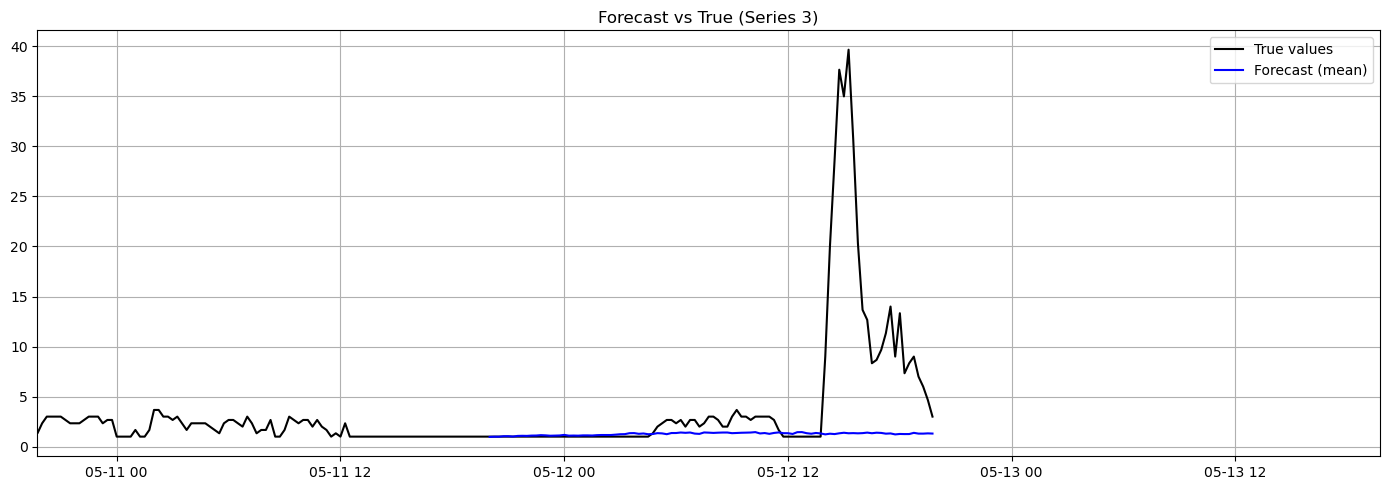

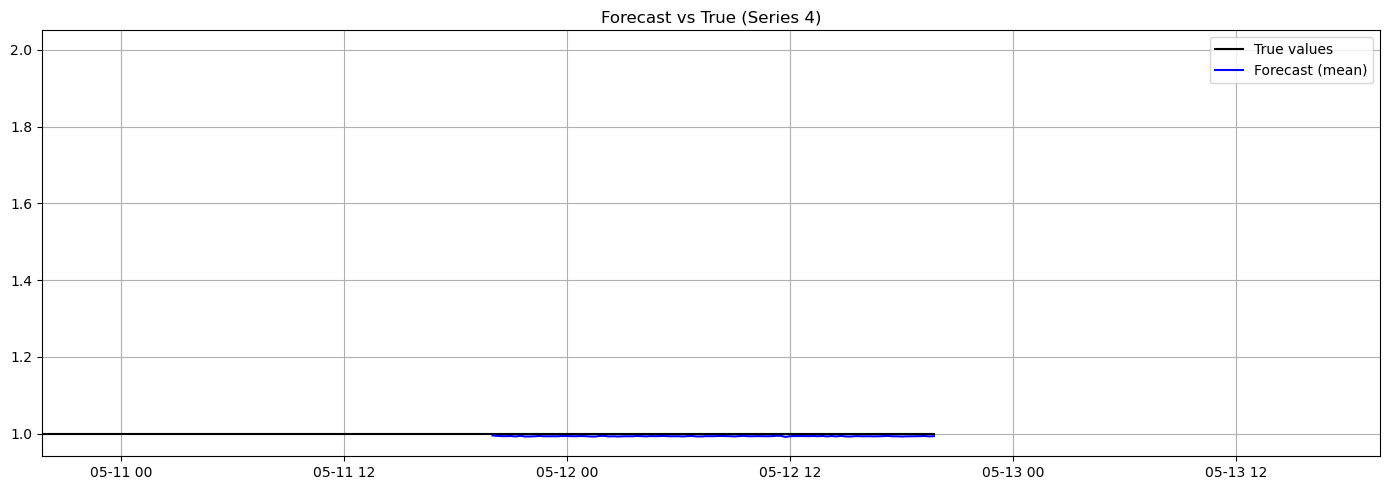

In [43]:
n_plots = len(forecast_list)  # or set a lower limit for visual clarity
for i in range(n_plots):
    ts = ts_list[i]
    forecast = forecast_list[i]

    # Convert PeriodIndex to Timestamp for plotting
    ts_index = ts.index.to_timestamp()

    # Forecast timestamps
    start = forecast.start_date.to_timestamp()
    freq = pd.Timedelta(forecast.freq)
    forecast_index = pd.date_range(start=start, periods=len(forecast.mean), freq=freq)

    # Determine x-axis limits (last 2 days)
    last_time = ts_index[-1]
    xlim_start = last_time - pd.Timedelta(days=2)
    xlim_end = last_time + pd.Timedelta(minutes=15 * len(forecast.mean))  # include forecast horizon

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(ts_index, ts.values, label="True values", color="black")
    plt.plot(forecast_index, forecast.mean, label="Forecast (mean)", color="blue")

    plt.title(f"Forecast vs True (Series {i})")
    plt.legend()
    plt.grid(True)
    plt.xlim(xlim_start, xlim_end)
    plt.tight_layout()
    plt.show()
